# EAM Iron

In this notebook, we will look at two different examples: The free energy of Fe BCC structure at 100K, and the transformation temperature for Fe from BCC to FCC.

The EAM potential that will be used: [Meyer, R, and P Entel. “Martensite-austenite transition and phonon dispersion curves of Fe1−xNix studied by molecular-dynamics simulations.” Phys. Rev. B 57, 5140.](https://doi.org/10.1103/PhysRevB.57.5140)

The reference data is from: [Freitas, Rodrigo, Mark Asta, and Maurice de Koning. “Nonequilibrium Free-Energy Calculation of Solids Using LAMMPS.” Computational Materials Science 112 (February 2016): 333–41.](https://doi.org/10.1016/j.commatsci.2015.10.050)

## Solid free energy

The input file for calculation of solid BCC Fe at 100 K is given below:

```
element: Fe
mass: 55.845
calculations:
- mode: fe 
  temperature: [100]
  pressure: [0]
  lattice: [BCC]
  repeat: [13, 13, 13]
  state: [solid]
  nsims: 3

md:
  pair_style: eam
  pair_coeff: "* * /home/users/menonsqr/Repos/pytint/examples/Fe_EAM/Fe.eam"
  timestep: 0.001
  nsmall: 10000
  tdamp: 0.1
  pdamp: 0.1
  te: 25000
  ts: 50000
  
queue:
  scheduler: local
  cores: 28
  commands:
    - conda activate py3
```

The calculation can be run by,
```
cd free_energy
tint -i input.yaml
```

After the calculation is over, the results are available in the `report.yaml` file. The file is shown below:

```
average:
  spring_constant: '3.02'
  vol/atom: 11.99459505071913
input:
  concentration: '1'
  element: Fe
  lattice: bcc
  pressure: 0.0
  temperature: 100
results:
  error: 8.79512327375223e-06
  free_energy: -4.263121166664903
  pv: 0.0
  reference_system: 0.014348234962822937
  work: -4.277469401627726
```

The calculated free energy is $-4.26312(9)$ eV/atom, the value reported in the publication is $-4.2631147(1)$ eV/atom.   

## BCC-FCC phase transformation in Fe

The input file for the required calculation is given below:

```
element: Fe
mass: 55.845
calculations:
- mode: ts
  temperature: [100, 1400]
  pressure: [0]
  lattice: [BCC]
  repeat: [13, 13, 13]
  state: [solid]
  nsims: 1
- mode: ts
  temperature: [100, 1400]
  pressure: [0]
  lattice: [FCC]
  repeat: [10, 10, 10]
  state: [solid]
  nsims: 1
  lattice_constant: [6.00]


md:
  pair_style: eam
  pair_coeff: "* * /home/users/menonsqr/Repos/pytint/examples/Fe_EAM/Fe.eam"
  timestep: 0.001
  nsmall: 10000
  tdamp: 0.1
  pdamp: 0.1
  te: 25000
  ts: 50000

queue:
  scheduler: local
  cores: 14
  commands:
    - conda activate py3
```

After the calculations are finished, the files can be read in.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bt, bfe, bferr = np.loadtxt("phase_transformation/ts-BCC-100-0/temperature_sweep.dat", unpack=True)
ft, ffe, fferr = np.loadtxt("phase_transformation/ts-FCC-100-0/temperature_sweep.dat", unpack=True)

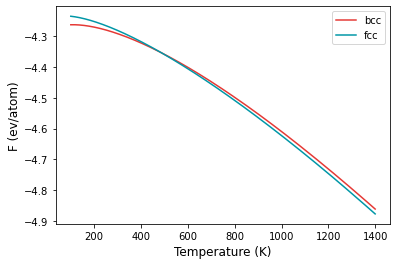

In [3]:
plt.plot(bt, bfe, color="#E53935", label="bcc")
plt.plot(ft, ffe, color="#0097A7", label="fcc")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

The free energy curves cross around 500K. We can check the exact temperature.

In [5]:
args = np.argsort(np.abs(bfe-ffe))
print(bt[args[0]], "K")

485.96850434196733 K


The phase transformation occurs at 486 K. This is 2.5 times lower than the experimental values, but is in good agreement with the reference data (487 K).